In [1]:
from importlib import reload
import sys
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

In [1]:
import pandas as pd

df1 = pd.read_csv('labeledTrainData.tsv', delimiter="\t")
df1 = df1.drop(['id'], axis=1)
df1.head()
df1

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...
5,1,I dont know why people think this is such a ba...
6,0,"This movie could have been very good, but come..."
7,0,I watched this video at a friend's house. I'm ...
8,0,"A friend of mine bought this film for £1, and ..."
9,1,<br /><br />This movie is full of references. ...


In [3]:
df2 = pd.read_csv('imdb_master.csv',encoding="latin-1")
df2.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [4]:
df2 = df2.drop(['Unnamed: 0','type','file'],axis=1)
df2.columns = ["review","sentiment"]
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [5]:
df2 = df2[df2.sentiment != 'unsup']
df2['sentiment'] = df2['sentiment'].map({'pos': 1, 'neg': 0})
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [6]:
df = pd.concat([df1, df2]).reset_index(drop=True)
df.head()

,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1


In [7]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

df['Processed_Reviews'] = df.review.apply(lambda x: clean_text(x))

In [8]:
df.head()

,review,sentiment,Processed_Reviews
0,With all this stuff going down at the moment w...,1,stuff go moment mj ive start listen music watc...
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,classic war world timothy hines entertain film...
2,The film starts with a manager (Nicholas Bell)...,0,film start manager nicholas bell give welcome ...
3,It must be assumed that those who praised this...,0,must assume praise film greatest film opera ev...
4,Superbly trashy and wondrously unpretentious 8...,1,superbly trashy wondrously unpretentious 80 ex...


In [9]:
df.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

128.51009333333334

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Processed_Reviews'])
list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']

embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 3
x=model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Using TensorFlow backend.


Train on 60000 samples, validate on 15000 samples
Epoch 1/3
60000/60000 [==============================] - 394s 7ms/step - loss: 0.3648 - acc: 0.8328 - val_loss: 0.3122 - val_acc: 0.8751
Epoch 2/3
60000/60000 [==============================] - 382s 6ms/step - loss: 0.2237 - acc: 0.9131 - val_loss: 0.2225 - val_acc: 0.9185
Epoch 3/3
60000/60000 [==============================] - 378s 6ms/step - loss: 0.1750 - acc: 0.9358 - val_loss: 0.1501 - val_acc: 0.9475


In [11]:
df_test=pd.read_csv("testData.tsv",header=0, delimiter="\t", quoting=3)
df_test.head()
df_test["review"]=df_test.review.apply(lambda x: clean_text(x))
df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["sentiment"]
list_sentences_test = df_test["review"]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

F1-score: 0.9557111422284457
Confusion matrix:


array([[11949,   556],
       [  551, 11944]], dtype=int64)

In [12]:
model.save('model_current.h5')

In [29]:
example1="A very bad and horrible film"
# Dont pass string,will tokenize characters,pass a list of 1 or more strings
example_list=tokenizer.texts_to_sequences(example1)
ex=pad_sequences(example_list, maxlen=maxlen)
abc=ex.ravel()
model.predict(abc)

array([[0.48406947],
       [0.48406947],
       [0.48406947],
       ...,
       [0.48406947],
       [0.48406947],
       [0.33371693]], dtype=float32)

In [37]:
ex2=["Really bad horrible film wish did not see","A great perfect film which is extremely good acting with plot"]
ex3=["Really bad horrible film wish did not see terrible but ok so far"]
ex_list=tokenizer.texts_to_sequences(ex2)
ex3_list=tokenizer.texts_to_sequences(ex3)
ex2padded=pad_sequences(ex_list,maxlen=maxlen)
ex3pad=pad_sequences(ex3_list,maxlen=maxlen)
model.predict(ex2padded)
#model.predict(ex3pad)

array([[0.02457551],
       [0.9733026 ]], dtype=float32)

Text(0,0.5,'Error(red) and Accuracy(green)')

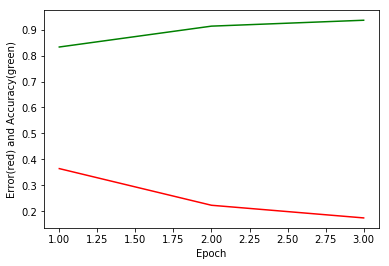

In [6]:
import matplotlib.pyplot as plt
loss=[0.3648,0.2237,0.1750] 
acc=[0.8328,0.9131,0.9358]
val_loss=[0.3122,0.2225,0.1501]
val_acc=[0.8751,0.9185,0.9475]
epoch=[1,2,3]
plt.plot(epoch,loss,color="red")
plt.plot(epoch,acc,color="green")
plt.xlabel("Epoch")
plt.ylabel("Error(red) and Accuracy(green)")